In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import socket

## FGVC_Aircraft Dataset

In [7]:
hostname = socket.gethostname()
DATASET_PATH = "/mnt/Win/Users/Xin/Datasets/FGVC_Aircraft"

if hostname == "BALI":
    DATASET_PATH = "data"

train_dataset = torchvision.datasets.FGVCAircraft(
    DATASET_PATH,
    split="train",
    annotation_level = "family",
      download=True,
    transform=torchvision.transforms.ToTensor()
)
val_dataset = torchvision.datasets.FGVCAircraft(
    DATASET_PATH,
    split="val",
    annotation_level = "family",
    #   download=True,
    transform=torchvision.transforms.ToTensor()
)
test_dataset = torchvision.datasets.FGVCAircraft(
    DATASET_PATH,
    split="test",
    annotation_level = "family",
    #   download=True,
    transform=torchvision.transforms.ToTensor()
)


0.0%

100.0%


Extracting data/fgvc-aircraft-2013b.tar.gz to data


In [8]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

3334
3333
3333


In [9]:
class_to_idx = train_dataset.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}
idx_to_class

{0: 'A300',
 1: 'A310',
 2: 'A320',
 3: 'A330',
 4: 'A340',
 5: 'A380',
 6: 'ATR-42',
 7: 'ATR-72',
 8: 'An-12',
 9: 'BAE 146',
 10: 'BAE-125',
 11: 'Beechcraft 1900',
 12: 'Boeing 707',
 13: 'Boeing 717',
 14: 'Boeing 727',
 15: 'Boeing 737',
 16: 'Boeing 747',
 17: 'Boeing 757',
 18: 'Boeing 767',
 19: 'Boeing 777',
 20: 'C-130',
 21: 'C-47',
 22: 'CRJ-200',
 23: 'CRJ-700',
 24: 'Cessna 172',
 25: 'Cessna 208',
 26: 'Cessna Citation',
 27: 'Challenger 600',
 28: 'DC-10',
 29: 'DC-3',
 30: 'DC-6',
 31: 'DC-8',
 32: 'DC-9',
 33: 'DH-82',
 34: 'DHC-1',
 35: 'DHC-6',
 36: 'DR-400',
 37: 'Dash 8',
 38: 'Dornier 328',
 39: 'EMB-120',
 40: 'Embraer E-Jet',
 41: 'Embraer ERJ 145',
 42: 'Embraer Legacy 600',
 43: 'Eurofighter Typhoon',
 44: 'F-16',
 45: 'F/A-18',
 46: 'Falcon 2000',
 47: 'Falcon 900',
 48: 'Fokker 100',
 49: 'Fokker 50',
 50: 'Fokker 70',
 51: 'Global Express',
 52: 'Gulfstream',
 53: 'Hawk T1',
 54: 'Il-76',
 55: 'King Air',
 56: 'L-1011',
 57: 'MD-11',
 58: 'MD-80',
 59: 'M

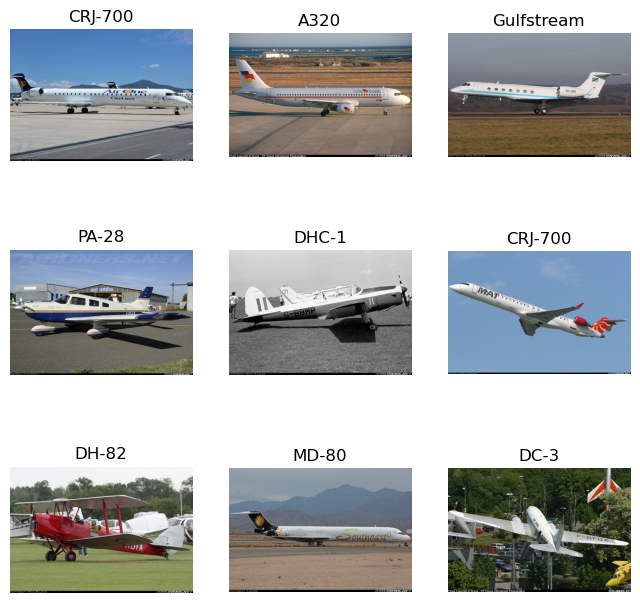

In [10]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    img = img.permute(1, 2, 0) # C, H, W -> H, W, C
    figure.add_subplot(rows, cols, i)
    plt.title(idx_to_class[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model

In [5]:
from ptflops import get_model_complexity_info
import torchvision.models as models

In [6]:
with torch.cuda.device(0):
  net = models.mobilenet_v2()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

MobileNetV2(
  3.5 M, 100.000% Params, 320.24 MMac, 100.000% MACs, 
  (features): Sequential(
    2.22 M, 63.451% Params, 318.96 MMac, 99.600% MACs, 
    (0): Conv2dNormActivation(
      928, 0.026% Params, 12.04 MMac, 3.760% MACs, 
      (0): Conv2d(864, 0.025% Params, 10.84 MMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, 0.002% Params, 802.82 KMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0, 0.000% Params, 401.41 KMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      896, 0.026% Params, 11.64 MMac, 3.635% MACs, 
      (conv): Sequential(
        896, 0.026% Params, 11.64 MMac, 3.635% MACs, 
        (0): Conv2dNormActivation(
          352, 0.010% Params, 4.82 MMac, 1.504% MACs, 
          (0): Conv2d(288, 0.008% Params, 3.61 MMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): Batch

In [7]:
with torch.cuda.device(0):
  net = models.resnet18()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNet(
  11.69 M, 100.000% Params, 1.82 GMac, 100.000% MACs, 
  (conv1): Conv2d(9.41 k, 0.080% Params, 118.01 MMac, 6.477% MACs, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(128, 0.001% Params, 1.61 MMac, 0.088% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(0, 0.000% Params, 802.82 KMac, 0.044% MACs, inplace=True)
  (maxpool): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.044% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    147.97 k, 1.266% Params, 464.83 MMac, 25.510% MACs, 
    (0): BasicBlock(
      73.98 k, 0.633% Params, 232.42 MMac, 12.755% MACs, 
      (conv1): Conv2d(36.86 k, 0.315% Params, 115.61 MMac, 6.344% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, 0.001% Params, 401.41 KMac, 0.022% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(0

In [8]:
with torch.cuda.device(0):
  net = models.resnet50()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNet(
  25.56 M, 100.000% Params, 4.12 GMac, 100.000% MACs, 
  (conv1): Conv2d(9.41 k, 0.037% Params, 118.01 MMac, 2.863% MACs, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(128, 0.001% Params, 1.61 MMac, 0.039% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(0, 0.000% Params, 802.82 KMac, 0.019% MACs, inplace=True)
  (maxpool): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.019% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    215.81 k, 0.844% Params, 680.39 MMac, 16.507% MACs, 
    (0): Bottleneck(
      75.01 k, 0.293% Params, 236.43 MMac, 5.736% MACs, 
      (conv1): Conv2d(4.1 k, 0.016% Params, 12.85 MMac, 0.312% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, 0.001% Params, 401.41 KMac, 0.010% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(36.86 k, 0.144% Pa